## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [196]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [197]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape


(545, 13)

In [198]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [199]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull().mean()

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [200]:
#5 Prepare  X (independent variables) and y (dependent variable)
X=df.drop(columns='price',axis=1)
y=df['price']

In [201]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [202]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [203]:
from sklearn.preprocessing import LabelEncoder,MaxAbsScaler

In [204]:
label_encoder = LabelEncoder()
X['mainroad'] = label_encoder.fit_transform(X['mainroad'])
columns=['guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for column in columns:
    X[column]=label_encoder.fit_transform(X[column])

In [205]:
X



,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [206]:
#9 Apply feature scaling on numerical variables
Scaler=MaxAbsScaler()
Scaler.fit_transform(X)

array([[0.45802469, 0.66666667, 0.5       , ..., 0.66666667, 1.        ,
        0.        ],
       [0.55308642, 0.66666667, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.61481481, 0.5       , 0.5       , ..., 0.66666667, 1.        ,
        0.5       ],
       ...,
       [0.22345679, 0.33333333, 0.25      , ..., 0.        , 0.        ,
        1.        ],
       [0.17962963, 0.5       , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.23765432, 0.5       , 0.25      , ..., 0.        , 0.        ,
        1.        ]])

In [207]:
X.shape

(545, 12)

In [208]:
y.shape

(545,)

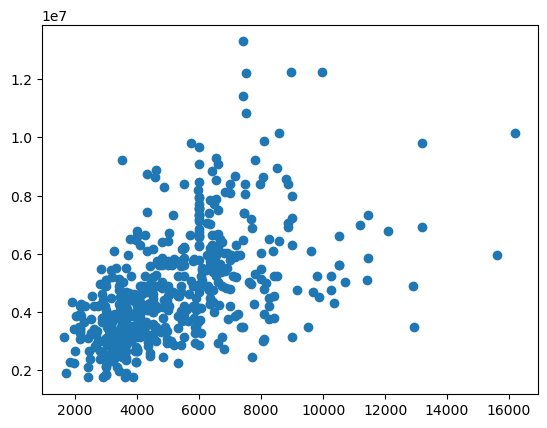

In [209]:
import matplotlib.pyplot as plt
plt.scatter(X['area'],y)


In [210]:
num_features = X.shape[1]
num_features

12

In [211]:
for i, column in enumerate(X.columns):
    print(i,column)


0 area
1 bedrooms
2 bathrooms
3 stories
4 mainroad
5 guestroom
6 basement
7 hotwaterheating
8 airconditioning
9 parking
10 prefarea
11 furnishingstatus


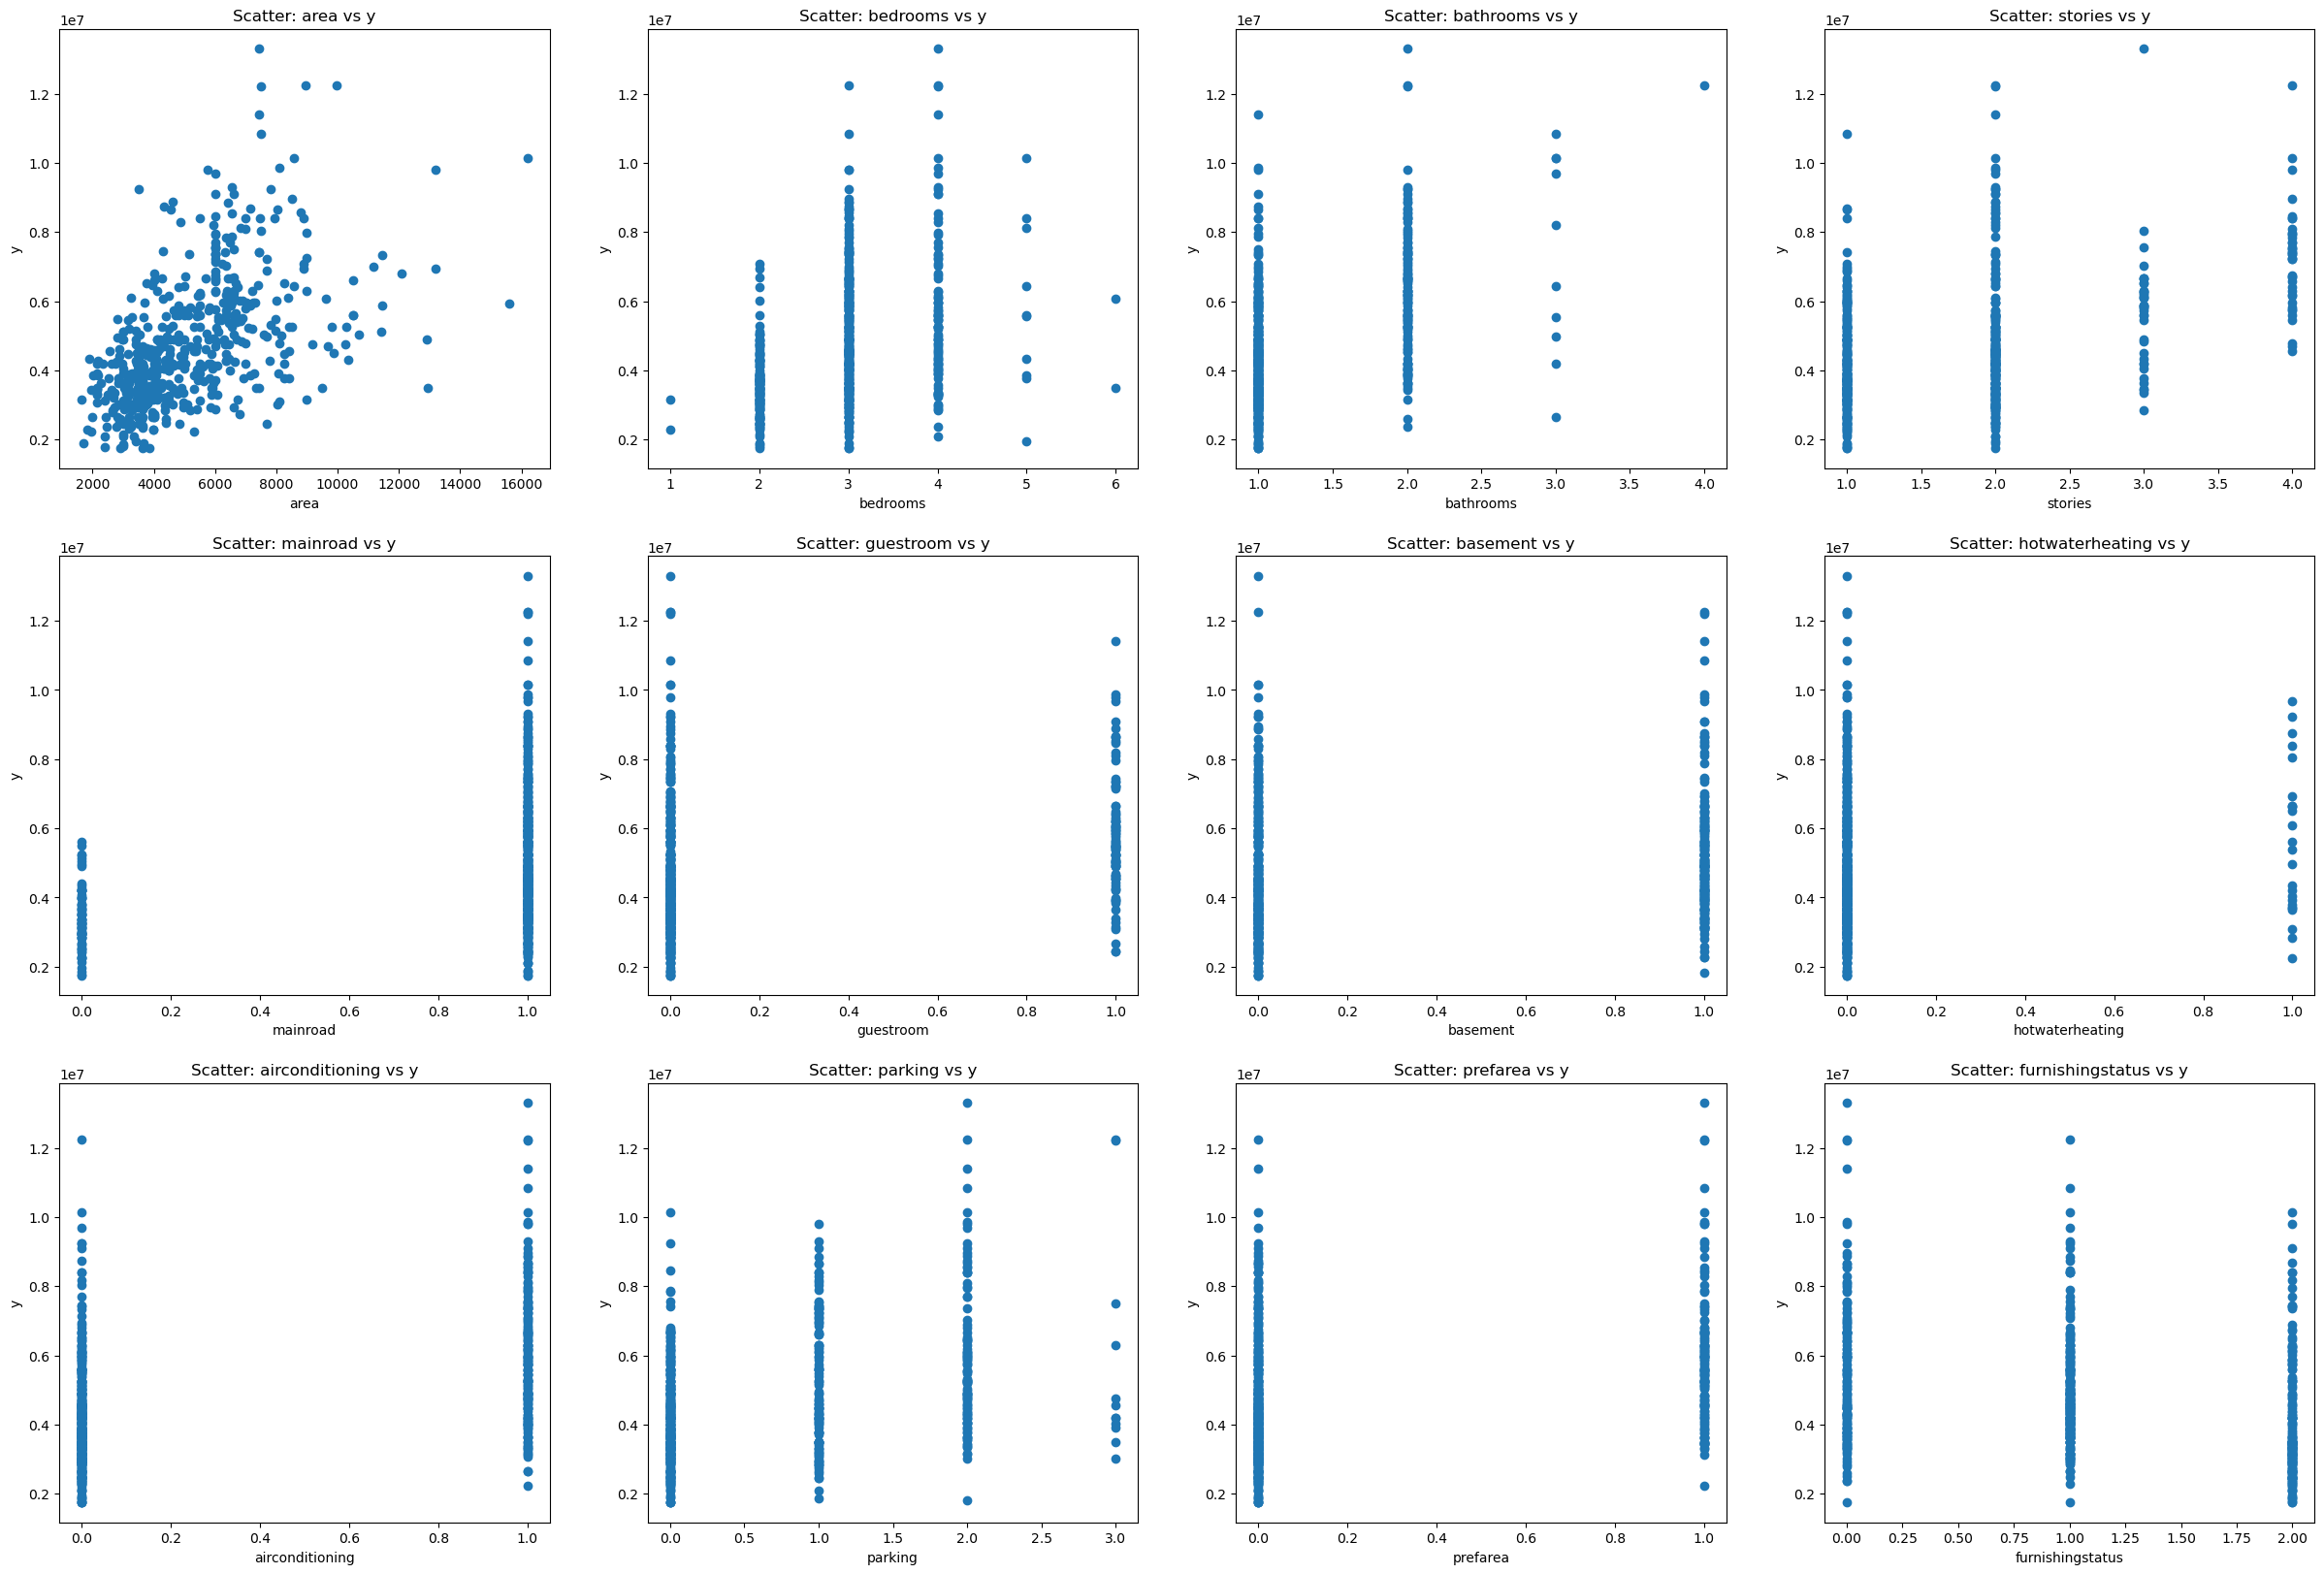

In [212]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X is your independent variables (features) and y is your dependent variable (target)

# Number of features
num_features = X.shape[1]

# Set up the figure size
plt.figure(figsize=(30, 20))

# Loop through all independent variables and plot a scatter plot
for i, column in enumerate(X.columns):
    plt.subplot(3, 4, i + 1)  # Creates a subplot for each feature
    plt.scatter(X[column], y)  # Scatter plot for each feature vs target variable
    plt.title(f'Scatter: {column} vs y')  # Title of each subplot
    plt.xlabel(column)  # Label for x-axis
    plt.ylabel('y')  # Label for y-axis
    # break

# Show the plot
#  Adjust layout to avoid overlapping
plt.show()


In [213]:
#7 Encoding categorical data in X


In [214]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [215]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [216]:
#8  Avoiding the Dummy Variable Trap
import pandas as pd
X=pd.get_dummies(X,columns=['furnishingstatus'],drop_first=True)

In [217]:
X['furnishingstatus_1']=X['furnishingstatus_1'].replace({False:0,True:1})
X['furnishingstatus_2']=X['furnishingstatus_2'].replace({False:0,True:1})

In [218]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_1,furnishingstatus_2
0,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [219]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X.shape,X_train.shape,X_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(545, 13) (436, 13) (109, 13)
(545,) (436,) (109,)


In [220]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression
model=LinearRegression()
X_train_fit=model.fit(X_train,y_train)


In [231]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_train_pred=model.predict(X_train)

In [232]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_train,y_train_pred)
r2 = r2_score(y_train, y_train_pred)
r2

0.6691042958112091

In [187]:
mse

1858550994574.5232

In [ ]:
error=

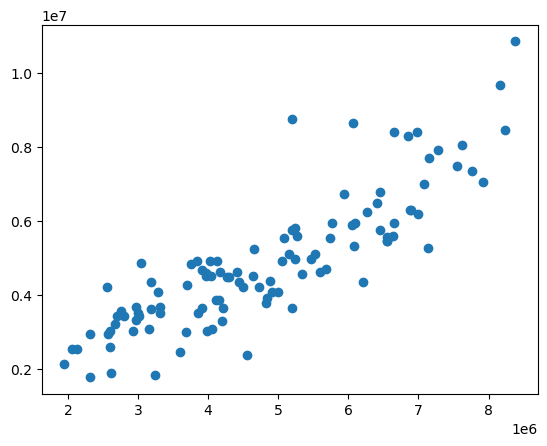

In [240]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
plt.scatter(model.predict(X_test),y_test)
#plt.plot(model.predict(X_test),y_test)
#plt.plot(y_pred,r2,color='red')
plt.show()


In [233]:
#14  Predic on the test set
y_test_pred=model.predict(X_test)

In [15]:
#15 Residual plot - plot y_pred in x axis and errors in y axis

In [235]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_test_pred)
r2 = r2_score(y_test, y_test_pred)
r2

0.7293443644408715

In [236]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all
from sklearn.metrics import adjusted_rand_score